In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
df = pd.read_csv(r"C:\Users\NAVEEN\Downloads\archive\StudentsPerformance.csv")

In [14]:
df.shape

(1000, 8)

In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
x = df.drop(columns='math score',axis=1)

In [17]:
y = df['math score']

In [55]:
cat_cols = df.select_dtypes(include="object").columns

In [57]:
num_cols = [col for col in df.columns if col not in cat_cols]

In [62]:
num_cols.remove('math score')

In [24]:
for col in cat_cols:
    print(col)
    print(df[col].unique())
    print(30*'-')

gender
['female' 'male']
------------------------------
race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------
parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------
lunch
['standard' 'free/reduced']
------------------------------
test preparation course
['none' 'completed']
------------------------------


In [65]:
numeric_transformer = StandardScaler()

In [66]:
cat_transformer = OneHotEncoder()

In [67]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
x_train.shape,x_test.shape

((800, 7), (200, 7))

In [69]:
y_test.shape

(200,)

In [70]:
preprocessor = ColumnTransformer([("onehotencode",cat_transformer,cat_cols),("scaler",numeric_transformer,num_cols)],remainder="passthrough")

In [71]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencode', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('scaler', StandardScaler(),
                                 ['reading score', 'writing score'])])

In [74]:
x_train = preprocessor.fit_transform(x_train)

In [77]:
x_test = preprocessor.transform(x_test)

In [79]:
feature_names = preprocessor.get_feature_names_out

In [97]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [98]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [100]:
model_list = []
r2_list = []

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("Root Mean Squared Error" ,round(model_train_rmse,3))
    print(f" Mean Absolute Error{round(model_train_mae,3)}")
    print(f"- R2 Score:{round(model_train_r2,3)}")
    print(30*'-')
    print('Model performance for Test set')
    print(f"Root Mean Squared Error{round(model_test_rmse,3)}")
    print(f" Mean Absolute Error{round(model_test_mae,3)}")
    print(f"- R2 Score:{round(model_test_r2,3)}")
    r2_list.append(round(model_test_r2,3))
    print(30*"=")
    print("\n")

Linear Regression
Model performance for Training set
Root Mean Squared Error 5.323
 Mean Absolute Error4.267
- R2 Score:0.874
------------------------------
Model performance for Test set
Root Mean Squared Error5.394
 Mean Absolute Error4.215
- R2 Score:0.88


Lasso
Model performance for Training set
Root Mean Squared Error 6.593
 Mean Absolute Error5.205
- R2 Score:0.807
------------------------------
Model performance for Test set
Root Mean Squared Error6.517
 Mean Absolute Error5.156
- R2 Score:0.825


Ridge
Model performance for Training set
Root Mean Squared Error 5.323
 Mean Absolute Error4.265
- R2 Score:0.874
------------------------------
Model performance for Test set
Root Mean Squared Error5.39
 Mean Absolute Error4.211
- R2 Score:0.881


K-Neighbors Regressor
Model performance for Training set
Root Mean Squared Error 5.695
 Mean Absolute Error4.501
- R2 Score:0.856
------------------------------
Model performance for Test set
Root Mean Squared Error7.212
 Mean Absolute Erro

In [105]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880592
10,Ridge,0.880592
8,Linear Regression,0.880433
0,Linear Regression,0.880433
13,Random Forest Regressor,0.851686
15,AdaBoost Regressor,0.849404
5,Random Forest Regressor,0.848645
7,AdaBoost Regressor,0.847341
14,XGBRegressor,0.827797
6,XGBRegressor,0.827797


In [107]:
best_model = LinearRegression()

In [108]:
best_model.fit(x_train,y_train)

LinearRegression()

In [109]:
y_pred = best_model.predict(x_test)

In [113]:
score = r2_score(y_test,y_pred)*100

In [115]:
print("Accuracy of the model is:",round(score,2))

Accuracy of the model is: 88.04


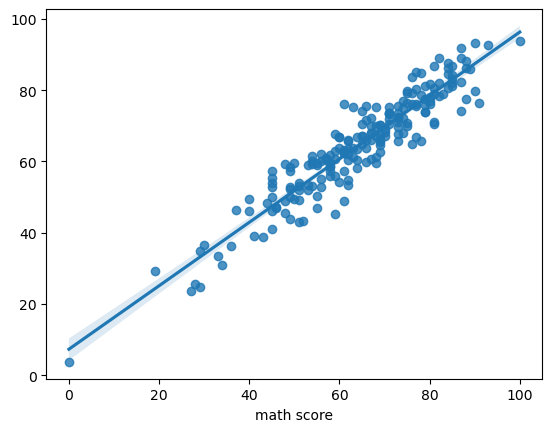

In [119]:
sns.regplot(x=y_test,y=y_pred)
plt.show()

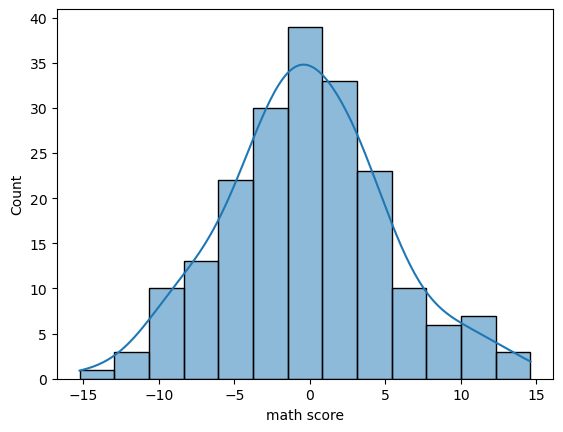

In [123]:
sns.histplot(y_test-y_pred,kde=True)
plt.show()

In [120]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
